<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/tmp/02_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### nltk
Strona biblioteki: [https://www.nltk.org/](https://www.nltk.org/)  

Podstawowa biblioteka do przetwarzania języka naturalnego w języku Python.

Aby zainstalować bibliotekę nltk, użyj polecenia poniżej:
```
!pip install nltk
```
Aby zaktualizować do najnowszej wersji użyj polecenia poniżej:
```
!pip install --upgrade nltk
```
Kurs stworzony w oparciu o wersję `3.2.5`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)



### <a name='0'></a> Import bibliotek

In [1]:
import re
import nltk

nltk.__version__

'3.2.5'

In [2]:
nltk.download('punkt')
nltk.download('twitter_samples')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.corpus import twitter_samples

positive = twitter_samples.strings('positive_tweets.json')
negative = twitter_samples.strings('negative_tweets.json')

In [4]:
positive[:10]

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
 '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM',
 "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI",
 '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.',
 'Jgh , but we have to go to Bayan :D bye',
 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing 

In [5]:
negative[:10]

['hopeless for tmr :(',
 "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(",
 '@Hegelbon That heart sliding into the waste basket. :(',
 '“@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too',
 'Dang starting next week I have "work" :(',
 "oh god, my babies' faces :( https://t.co/9fcwGvaki0",
 '@RileyMcDonough make me smile :((',
 '@f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( http://t.co/XvmTUikWln',
 'why?:("@tahuodyy: sialan:( https://t.co/Hv1i0xcrL2"',
 'Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http://t.co/dZZdqmf7Cz']

In [6]:
positive_tokenized = twitter_samples.tokenized('positive_tweets.json')
negative_tokenized = twitter_samples.tokenized('negative_tweets.json')

for tweet in positive_tokenized[:10]:
    print(tweet)

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']
['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!']
['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!']
['@97sides', 'CONGRATS', ':)']
['yeaaaah', 'yippppy', '!', '!', '!', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'days']
['@BhaktisBanter', '@PallaviRuhail', 'This', 'one', 'is', 'irresistible', ':)', '#FlipkartFashionFriday', 'http://t.co/EbZ0L2VENM']
['We', "don't", 'like', 'to', 'keep', 'our', 'lovely', 'customers', 'waiting', 'for', 'long', '!', 'We', 'ho

In [7]:
from nltk.tag import pos_tag

for tweet in positive_tokenized[:10]:
    print(pos_tag(tweet))

[('#FollowFriday', 'JJ'), ('@France_Inte', 'NNP'), ('@PKuchly57', 'NNP'), ('@Milipol_Paris', 'NNP'), ('for', 'IN'), ('being', 'VBG'), ('top', 'JJ'), ('engaged', 'VBN'), ('members', 'NNS'), ('in', 'IN'), ('my', 'PRP$'), ('community', 'NN'), ('this', 'DT'), ('week', 'NN'), (':)', 'NN')]
[('@Lamb2ja', 'NN'), ('Hey', 'NNP'), ('James', 'NNP'), ('!', '.'), ('How', 'NNP'), ('odd', 'JJ'), (':/', 'NNP'), ('Please', 'NNP'), ('call', 'VB'), ('our', 'PRP$'), ('Contact', 'NNP'), ('Centre', 'NNP'), ('on', 'IN'), ('02392441234', 'CD'), ('and', 'CC'), ('we', 'PRP'), ('will', 'MD'), ('be', 'VB'), ('able', 'JJ'), ('to', 'TO'), ('assist', 'VB'), ('you', 'PRP'), (':)', 'VBP'), ('Many', 'JJ'), ('thanks', 'NNS'), ('!', '.')]
[('@DespiteOfficial', 'JJ'), ('we', 'PRP'), ('had', 'VBD'), ('a', 'DT'), ('listen', 'VBN'), ('last', 'JJ'), ('night', 'NN'), (':)', 'NN'), ('As', 'IN'), ('You', 'PRP'), ('Bleed', 'VBP'), ('is', 'VBZ'), ('an', 'DT'), ('amazing', 'JJ'), ('track', 'NN'), ('.', '.'), ('When', 'WRB'), ('are'

https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [0]:
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_tweet(tokens):

    lemmatizer = WordNetLemmatizer()
    tweet_lemmatized = []

    for token, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        tweet_lemmatized.append(lemmatizer.lemmatize(token, pos))
        
    return tweet_lemmatized

In [9]:
idx = 0
for token in zip(positive_tokenized[idx], lemmatize_tweet(positive_tokenized[idx])):
    print(token)

('#FollowFriday', '#FollowFriday')
('@France_Inte', '@France_Inte')
('@PKuchly57', '@PKuchly57')
('@Milipol_Paris', '@Milipol_Paris')
('for', 'for')
('being', 'be')
('top', 'top')
('engaged', 'engage')
('members', 'member')
('in', 'in')
('my', 'my')
('community', 'community')
('this', 'this')
('week', 'week')
(':)', ':)')


In [0]:
def clean_tweet(tokens):

    lemmatizer = WordNetLemmatizer()
    tweet_cleaned = []
    
    for token, tag in pos_tag(tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', token)
        token = re.sub('(@[A-Za-z0-9_]+)', '', token)

        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        token = lemmatizer.lemmatize(token, pos)
        token = token.lower()
        tweet_cleaned.append(token)

    return tweet_cleaned

In [11]:
idx = 5
for token in zip(positive_tokenized[idx], clean_tweet(positive_tokenized[idx])):
    print(token)

('@BhaktisBanter', '')
('@PallaviRuhail', '')
('This', 'this')
('one', 'one')
('is', 'be')
('irresistible', 'irresistible')
(':)', ':)')
('#FlipkartFashionFriday', '#flipkartfashionfriday')
('http://t.co/EbZ0L2VENM', '')


In [12]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words and token not in string.punctuation and len(token) > 0]

In [14]:
idx = 0
for token in [positive_tokenized[idx], remove_stopwords(clean_tweet(positive_tokenized[idx]))]:
    print(token)

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']
['#followfriday', 'top', 'engage', 'member', 'community', 'week', ':)']


In [15]:
idx = 1
for token in [positive_tokenized[idx], remove_stopwords(clean_tweet(positive_tokenized[idx]))]:
    print(token)

['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!']
['hey', 'james', 'odd', ':/', 'please', 'call', 'contact', 'centre', '02392441234', 'able', 'assist', ':)', 'many', 'thanks']


In [0]:
positive_cleaned = [remove_stopwords(clean_tweet(tweet)) for tweet in positive_tokenized]
negative_cleaned = [remove_stopwords(clean_tweet(tweet)) for tweet in negative_tokenized]

In [17]:
for tweet in positive_cleaned[:10]:
    print(tweet)

['#followfriday', 'top', 'engage', 'member', 'community', 'week', ':)']
['hey', 'james', 'odd', ':/', 'please', 'call', 'contact', 'centre', '02392441234', 'able', 'assist', ':)', 'many', 'thanks']
['listen', 'last', 'night', ':)', 'bleed', 'amazing', 'track', 'scotland']
['congrats', ':)']
['yeaaaah', 'yippppy', 'accnt', 'verify', 'rqst', 'succeed', 'get', 'blue', 'tick', 'mark', 'fb', 'profile', ':)', '15', 'day']
['one', 'irresistible', ':)', '#flipkartfashionfriday']
['like', 'keep', 'lovely', 'customer', 'wait', 'long', 'hope', 'enjoy', 'happy', 'friday', 'lwwf', ':)']
['second', 'thought', '’', 'enough', 'time', 'dd', ':)', 'new', 'short', 'enter', 'system', 'sheep', 'must', 'buy']
['jgh', 'go', 'bayan', ':d', 'bye']
['act', 'mischievousness', 'call', 'etl', 'layer', 'in-house', 'warehouse', 'app', 'katamari', 'well', '…', 'name', 'imply', ':p']


In [0]:
from nltk import FreqDist

In [19]:
corpus = []
for tweet in positive_cleaned:
    corpus.extend(tweet)

freq = FreqDist(corpus)
freq.most_common(15)

[(':)', 3691),
 (':-)', 701),
 (':d', 658),
 ('thanks', 388),
 ('follow', 357),
 ('love', 333),
 ('...', 290),
 ('good', 283),
 ('get', 263),
 ('thank', 253),
 ('u', 245),
 ('day', 242),
 ('like', 229),
 ('see', 195),
 ('happy', 192)]

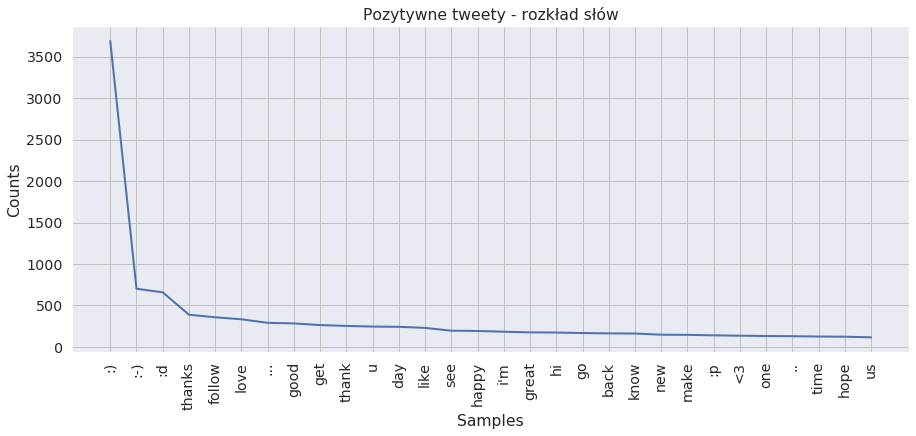

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

plt.figure(figsize=(15, 6))
freq.plot(30, title='Pozytywne tweety - rozkład słów', cumulative=False)

In [21]:
corpus = []
for tweet in negative_cleaned:
    corpus.extend(tweet)

freq = FreqDist(corpus)
freq.most_common(10)

[(':(', 4585),
 (':-(', 501),
 ("i'm", 343),
 ('...', 332),
 ('get', 325),
 ('miss', 291),
 ('go', 275),
 ('please', 275),
 ('want', 246),
 ('like', 218)]

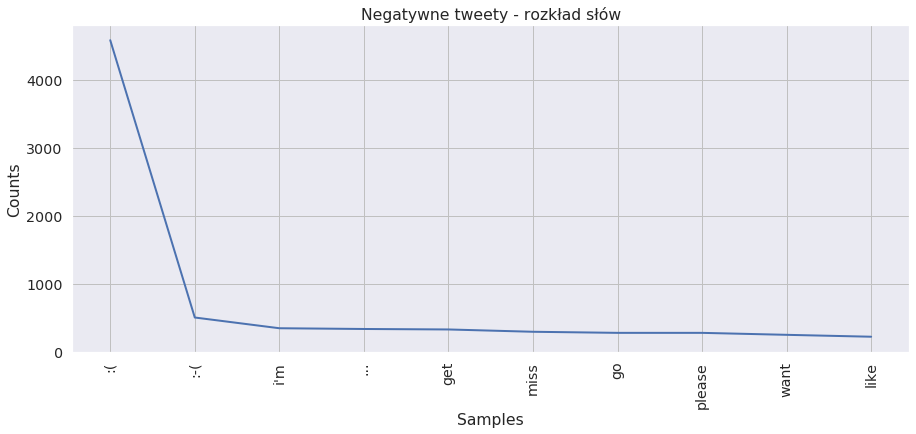

In [22]:
plt.figure(figsize=(15, 6))
freq.plot(10, title='Negatywne tweety - rozkład słów', cumulative=False)

In [29]:
for tweet in positive_cleaned[:3]:
    print(dict([token, True] for token in tweet))

{'#followfriday': True, 'top': True, 'engage': True, 'member': True, 'community': True, 'week': True, ':)': True}
{'hey': True, 'james': True, 'odd': True, ':/': True, 'please': True, 'call': True, 'contact': True, 'centre': True, '02392441234': True, 'able': True, 'assist': True, ':)': True, 'many': True, 'thanks': True}
{'listen': True, 'last': True, 'night': True, ':)': True, 'bleed': True, 'amazing': True, 'track': True, 'scotland': True}


In [0]:
def prepare(cleaned_tweets):
    for tweet in cleaned_tweets:
        yield dict([token, True] for token in tweet)
 
positive_cleaned_labeled = prepare(positive_cleaned)
negative_cleaned_labeled = prepare(negative_cleaned)

In [0]:
# positive_cleaned_labeled = [dict([(token, True)]) for tweet in positive_cleaned for token in tweet]
# negative_cleaned_labeled = [dict([(token, True)]) for tweet in negative_cleaned for token in tweet]

In [0]:
positive_dataset = [(tweet, 'Positive') for tweet in positive_cleaned_labeled]
negative_dataset = [(tweet, 'Negative') for tweet in negative_cleaned_labeled]

In [0]:
dataset = positive_dataset + negative_dataset

In [0]:
import random

random.shuffle(dataset)

In [53]:
for tweet in dataset[:10]:
    print(tweet)

({'anyone': True, 'awake': True, ':-(': True}, 'Negative')
({':-(': True, 'please': True, 'notice': True, 'h': True}, 'Negative')
({'#psygustokita': True, "i'm": True, 'huge': True, 'fan': True, 'latin': True, 'beauty': True, ':-)': True, 'queen': True, 'kath': True, 'asian': True, 'version': True}, 'Positive')
({"i'm": True, 'start': True, 'grind': True, 'yt': True, ':)': True}, 'Positive')
({'u': True, 'cute': True, 'thank': True, ':(': True}, 'Negative')
({'dog': True, 'guy': True, 'hilarious': True, 'brilliant': True, 'interview': True, 'replay': True, 'iplayer': True, 'late': True, 'funny': True, ':)': True}, 'Positive')
({'wish': True, 'could': True, 'dm': True, 'cute': True, 'thing': True, ':(': True, 'preferably': True, 'kitten': True, 'puppy': True}, 'Negative')
({'hi': True, 'see': True, 'u': True, 'like': True, 'fourfiveseconds': True, 'think': True, 'might': True, 'deaf': True, 'ears': True, 'plz': True, 'let': True, 'know': True, ':)': True}, 'Positive')
({'noo': True, "i'

In [0]:
train_data = dataset[:7000]
test_data = dataset[7000:]

In [0]:
from nltk import classify
from nltk import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(train_data)

In [57]:
classify.accuracy(classifier, test_data)

0.9976666666666667

In [59]:
classifier.show_most_informative_features(15)

Most Informative Features
                      :( = True           Negati : Positi =   2059.9 : 1.0
                      :) = True           Positi : Negati =   1659.6 : 1.0
                follower = True           Positi : Negati =     37.9 : 1.0
                     sad = True           Negati : Positi =     20.6 : 1.0
                     bam = True           Positi : Negati =     16.2 : 1.0
                   enjoy = True           Positi : Negati =     15.4 : 1.0
               goodnight = True           Positi : Negati =     14.2 : 1.0
                  arrive = True           Positi : Negati =     13.4 : 1.0
                    glad = True           Positi : Negati =     12.1 : 1.0
                     ugh = True           Negati : Positi =     11.8 : 1.0
                    damn = True           Negati : Positi =     11.8 : 1.0
                followed = True           Negati : Positi =     11.4 : 1.0
                 welcome = True           Positi : Negati =     11.3 : 1.0

In [64]:
from nltk.tokenize import word_tokenize

sample = 'It isn\'t fair.'
tokens = remove_stopwords(word_tokenize(sample))
tokens

['It', "n't", 'fair']

In [66]:
tokens_dict = dict([token, True] for token in tokens)
tokens_dict

{'It': True, 'fair': True, "n't": True}

In [68]:
classifier.classify(tokens_dict)

'Negative'